In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
#notebook 이미지가 별도로 실행됨

from matplotlib import font_manager, rc
from math import sqrt

# matplotlib에서 한글 폰트를 사용하기 위해 설정
import matplotlib.font_manager as fm

# 윈도우 방법
# font_name = fm.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
# plt.rc('font',family = font_name)
# 맥북 방법
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [9]:
ratings={
    'user1': {'captain marvel': 5, 'last mission':4, 'money':2},
    'user2': {'captain marvel': 4, 'last mission':2, 'money':1},
    'me': {'last mission':4, 'money':3},
    'user3': {'captain marvel': 3.5, 'last mission':4, 'money':4}
}

In [10]:
ratings

{'user1': {'captain marvel': 5, 'last mission': 4, 'money': 2},
 'user2': {'captain marvel': 4, 'last mission': 2, 'money': 1},
 'me': {'last mission': 4, 'money': 3},
 'user3': {'captain marvel': 3.5, 'last mission': 4, 'money': 4}}

In [11]:
ratings['me']

{'last mission': 4, 'money': 3}

In [12]:
ratings['me']['money']

3

# 피타고라스

In [13]:
# 유사도
def similarity(i , j):
    return sqrt(pow(i, 2) + pow(j, 2))
# pow(a, b): a의 b제곱
# sqrt(a): 제곱했을 때 a가 되는 수

In [14]:
var1 = ratings['me']['last mission'] - ratings['user3']['last mission']
var2 = ratings['me']['money'] - ratings['user3']['money']
similarity(var1, var2)

1.0

In [15]:
for i in ratings:
    if i != 'me': # 자기자신 제외
        num1 = ratings['me']['last mission'] - ratings[i]['last mission']
        num2 = ratings['me']['money'] - ratings[i]['money']
        print(i, ':', similarity(num1, num2)) # 거리가 멀수록 큰 값
        # 유사성이 다를수록 값이 차이가 나는 것으로 보인당.

user1 : 1.0
user2 : 2.8284271247461903
user3 : 1.0


In [16]:
# 정규화 (0-1) 0: 거리가 먼 데이터, 1: 거리가 가까운 데이터
for i in ratings:
    if i != 'me': # 자기자신 제외
        num1 = ratings['me']['last mission'] - ratings[i]['last mission']
        num2 = ratings['me']['money'] - ratings[i]['money']
        print(i, ':', 1 / (1 + similarity(num1, num2))) # 1을 더한 후 1을 나눔

user1 : 0.5
user2 : 0.2612038749637414
user3 : 0.5


In [17]:
# 다차원의 유사도 구하기
def similarity_distance(data, name1, name2):
    sum = 0
    for i in data[name1]:
        if i in data[name2]: # 같은 영화를 봤다면 진행
            # 각 축을 기준으로 차이를 구하고 제곱 한 후, 총합의 제곱근의 거리 점수
            sum += pow(data[name1][i] - data[name2][i], 2)
            
    # 유사할 수록 더 높은 값을 가지는 계산식 사용, 결과 값이 0과 1 사이의 값을 반환
    # 반환 값이 1에 가까울수록 유사도가 높다
    return 1 / (1 + sqrt(sum))

In [18]:
print(similarity_distance(ratings, 'user1', 'user2'))
print(similarity_distance(ratings, 'user1', 'user3'))

0.28989794855663564
0.2857142857142857


In [19]:
# 전체 데이터에서 유사도가 가장 가까운 사람 구하기
def nearest_user(data, name, index=3):
    nearest_user_list =[]
    for u in data:
        if name != u: # 비교시 자신은 제외
            nearest_user_list.append((similarity_distance(data, name, u), u)) # 튜플형태로 저장
    # 유사도 높은 순으로 정렬
    nearest_user_list.sort() # 오름차순
    nearest_user_list.reverse() # 역차순 (오름차순 -> 내림차순)
    
    return nearest_user_list[:index]

In [20]:
nearest_user(ratings, 'user2')

[(0.28989794855663564, 'user1'),
 (0.2612038749637414, 'me'),
 (0.21551468935838852, 'user3')]

In [21]:
# 평점과 이름 분리
def nearest_user(data, name, index=3):
    score = []
    names = []
    for u in data:
        if name != u: # 비교시 자신은 제외
            score.append(similarity_distance(data, name, u)) # 튜플형태로 저장
            names.append(u)
    # 유사도 높은 순으로 정렬
    score.sort() # 오름차순
    score.reverse() # 역차순 (오름차순 -> 내림차순)
    names.sort() # 오름차순
    names.reverse() # 역차순 (오름차순 -> 내림차순)
    
    return score, names

In [22]:
# 시각화 하기 위한 분류
score, names = nearest_user(ratings, 'user2')
print(score)
print(names)

[0.28989794855663564, 0.2612038749637414, 0.21551468935838852]
['user3', 'user1', 'me']


In [25]:
# 시각화
def draw_chart(data, labels): 
    positions = range(len(data))
    plt.barh(positions, data, height=0.5, color='b')
    plt.yticks(positions, labels)
    plt.xlabel('similarity')
    plt.ylabel('이름')
    plt.show()

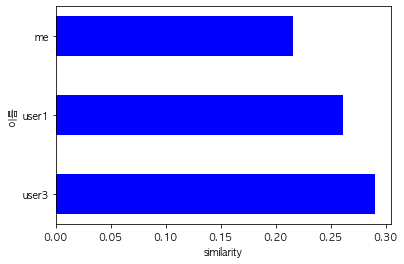

In [26]:
draw_chart(score, names)